# Neural Networks

In [1]:
import numpy as np
import pandas as pd
import statistics
import random
import scipy
import matplotlib.pyplot as plt

## A Simple example

In [2]:
class Neuron:
    def __init__(self, weights, activation_func, bias = 0):
        self.weights = weights
        self.activation = activation_func
        self.bias = bias
    def output(self, x):
        total = np.dot(self.weights, x)
        return self.activation(total + self.bias)

In [3]:
# Activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
n = Neuron([0.2, 0.3, 0.4], sigmoid)
# Inputs
inp = np.array([2,1,7])
result = n.output(inp)
print(result)

0.9706877692486436


The purpose of training is to calculate (find) appropriate values for weights which is the outcome of the training.

## Layers

- Input layer: Each input is represented as a node. However, they do NOT act as a node. The input and output value is same and equal. # of nodes = # features
- Hidden layer(s): # layers and nodes are dependent on the complexity of the problem.
    - If the problem is lineary separable: No layers needed.
    - One layer is usually adequate and two layers are usually capable of solving most of the problems
    - Number of nodes: There are some guidelines available:
        1. should be less than or equal to 2*input_layer_neuron_number
        2.  
- Output layer: # of nodes depends on the problem we're trying to solve.
    - If it is a binary classification (or logistic regression) problem, single neuron is adequate. 

### How to configure?
- Only input and output layers are sufficient to solve Linearly seperable classification and/or simple regression problems.
- The definition and the number of the hidden layer are dependent on the complexity of the problem. If there is more than two hidden layers, then the network is called as **deep learning**.

In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

## Diabetes Example

### Load Data

In [6]:
diabetes_data = pd.read_csv('files/diabetes.csv')

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Extract Data

In [8]:
x_data = diabetes_data.drop('Outcome', axis=1)
y_data = diabetes_data['Outcome']
x_data.shape

(768, 8)

### Split Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

### Construct Neural Networks

1. Generate Model

In [10]:
from tensorflow.keras.models import Sequential

2024-07-09 09:29:17.346691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model = Sequential()

2024-07-09 09:29:18.721989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 09:29:18.725738: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


2. Define Layers: **Dense** is the most frequently used layer class w/ the following API. Every neuron in the previous layer is connected to each neuron for the defined layer.
    ```python
    tensorflow.keras.layers.Dense(units, # Number of neurons
        activation=None, # Activation function to be used by all neurons in the layer. Prefer tensorflow.keras.activations if function objects to be used
        use_bias=True,
        kernel_initializer='glorot_uniform', # How to define Initial values of weights
        bias_initializer='zeros',
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        **kwargs # input_dim or input_shape -> Defines neuron number for the input layer
    )
    ```
   **NOTE**: Keras does NOT allow to explicitly define input layer using layer class. Input layer is added implicitly when the first layer is added to the model by passing `input_dim` or `input_shape`.

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
model.add(Dense(64, input_dim=x_data.shape[1], activation='relu', name='Hidden_1'))
# First layer in the hidden layer with 16 neurons. This also defines the input layer with 8 neurons
# relu activation is selected. Most of the time it is sufficient

Activation functions can be passed using `tensorflow.keras.activations` module. Let's add other modules using that module. Selection of activation functions:
    - Binary Classification problems: `relu` for hidden layers and `sigmoid` for output layer

In [14]:
from tensorflow.keras.activations import relu

In [15]:
model.add(Dense(64, activation=relu, name='Hidden_2'))

In [16]:
model.add(Dense(1, activation='sigmoid', name='Output'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 64)                576       
                                                                 
 Hidden_2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


Param # = # weights + # bias

3. Model compilation: 

In [18]:
from tensorflow.keras.losses import binary_crossentropy, msle
from tensorflow.keras.metrics import Accuracy, binary_accuracy, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from tensorflow.keras.optimizers import Adam, RMSprop

In [19]:
model.compile(optimizer=RMSprop(), loss=binary_crossentropy, metrics=[binary_accuracy])

4. Train model

In [20]:
model_hist = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=0)
from tensorflow.keras.callbacks import CSVLogger
csv_callback = CSVLogger('files/diabetes_logger.csv')
model_hist2 = model.fit(x_train, y_train, epochs=500, batch_size=30, verbose=0, callbacks=[csv_callback])

5. Evaluate test data

In [21]:
eval_result = model.evaluate(x_test, y_test)
print(eval_result) # eval_result[0]=> loss function value eval_result[1]-> selected metrics value

5/5 [==============================] - 0s 12ms/step - loss: 4.1929 - binary_accuracy: 0.7208
[4.192895889282227, 0.7207792401313782]


In [22]:
for name, val in zip(model.metrics_names, eval_result):
    print(f'{name}: {val}')

loss: 4.192895889282227
binary_accuracy: 0.7207792401313782


6. Predict: `predict` method returns the result based on the selection of the activation function in the output layer. For this instance, `sigmoid` is selected and results >= 0.5 states that it is true.

In [23]:
y_pred = model.predict(x_test)
for i in range(len(y_pred)):
    print(y_pred[i, 0])

5/5 [==============================] - 0s 12ms/step
0.9981792
0.99807405
1.997156e-05
1.2402503e-22
6.811118e-05
0.00046959924
6.0866537e-06
0.14791834
0.0019857225
6.590199e-08
1.060998e-07
2.469519e-06
1.0
1.0
1.976994e-34
0.9938675
0.8598762
0.0068010935
0.0003969241
0.05984373
0.9847273
0.0016227971
0.999999
0.037151735
0.00048958685
0.9999037
8.358601e-06
0.9777406
1.6919569e-09
0.9996816
0.22557198
0.99999917
2.3480904e-07
0.87251794
0.5058675
0.77030116
5.8708492e-06
0.01805157
0.0002497918
0.99999905
5.116126e-07
0.001922104
3.308535e-17
2.7265941e-12
3.9083177e-05
0.00022359837
1.0
0.99997276
0.013285396
0.20624135
1.849267e-20
0.083371185
1.7039925e-08
0.00014407332
0.9964044
0.00032436877
0.9875521
6.067106e-14
3.582329e-21
0.01944249
1.7176924e-29
2.7130336e-27
1.0
3.0893384e-06
0.9999602
0.0037708627
0.0
0.9999886
0.9999989
0.99999934
1.0
0.9999998
0.017793318
3.5141405e-13
0.9994131
3.189743e-12
0.083272286
0.0073354025
7.9091643e-07
0.98757493
0.0034929947
0.022180138
0.

7. Evaluate Results

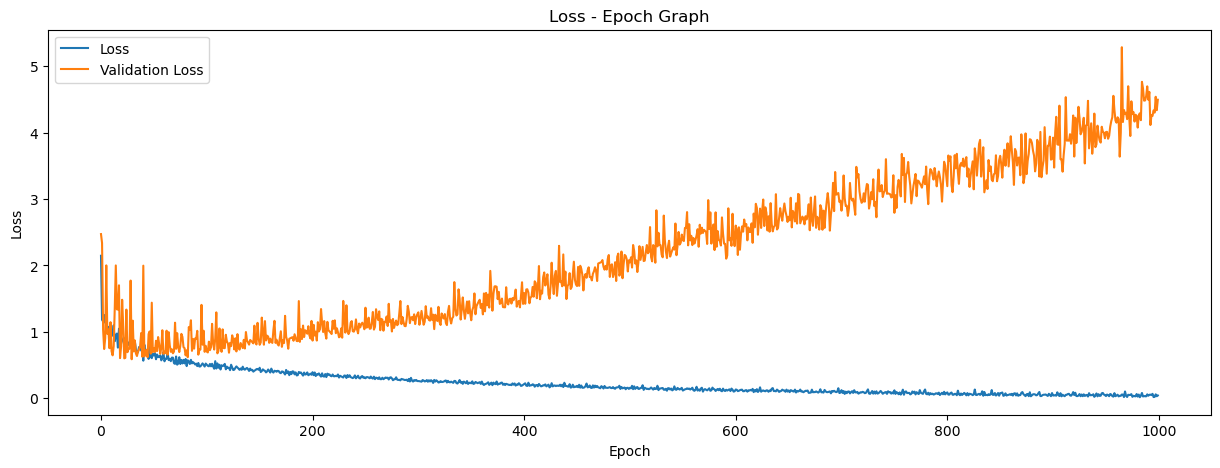

In [24]:
plt.figure(figsize=(15,5))
plt.title('Loss - Epoch Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model_hist.epoch, model_hist.history['loss'])
plt.plot(model_hist.epoch, model_hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

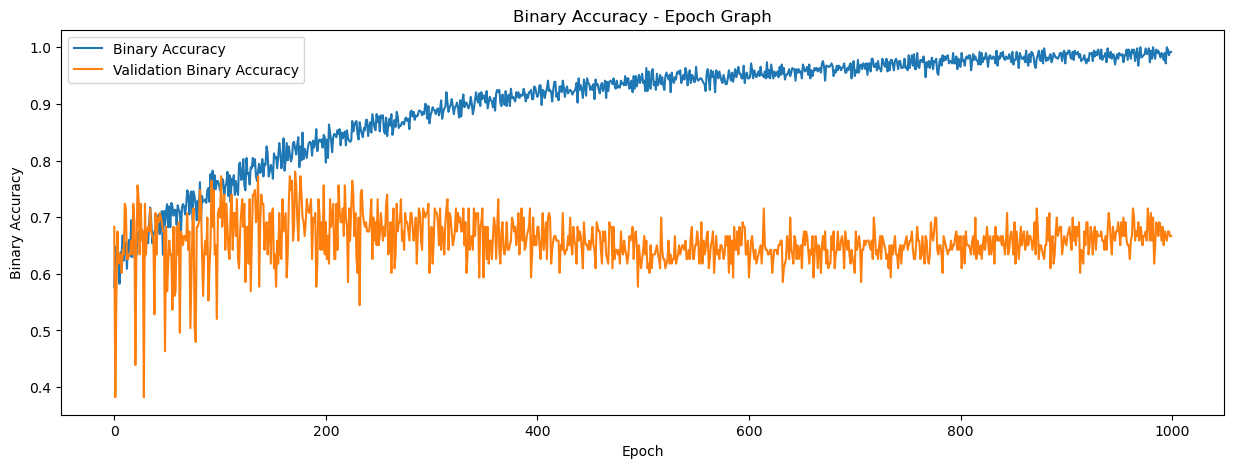

In [25]:
plt.figure(figsize=(15,5))
plt.title('Binary Accuracy - Epoch Graph')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(model_hist.epoch, model_hist.history['binary_accuracy'])
plt.plot(model_hist.epoch, model_hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()